<a href="https://www.kaggle.com/code/parisrohan/eda-nyc-taxi-trip?scriptVersionId=100197480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-taxi-trip-duration/nyc_taxi_trip_duration.csv


In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings('ignore')

## 1. Data collection

In [3]:
#read the dataset and store it into a dataframe
df_data = pd.read_csv('/kaggle/input/nyc-taxi-trip-duration/nyc_taxi_trip_duration.csv')
df_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#Check the shape of dataset
"The dataset has {} rows and {} columns".format(df_data.shape[0], df_data.shape[1])

'The dataset has 729322 rows and 11 columns'

## 2. Feature exploration

In [5]:
#Check the datatypes of each feature
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


Note:
* pickup_datetime and dropoff_datetime features must have datetime datatype

In [6]:
def convert_to_date_dtype(Dataframe,col):
    #function to convert the given feature into datetime
    Dataframe[col] = pd.to_datetime(Dataframe[col], format= '%Y-%m-%d %H:%M:%S')
    #extract required components from the datetime feature
    Dataframe[col+'_day'] = Dataframe[col].dt.dayofweek
    Dataframe[col+'_month'] = Dataframe[col].dt.month
    Dataframe[col+'_hour'] = Dataframe[col].dt.hour

In [7]:
#convert the features into datetime datatype
convert_to_date_dtype(df_data, 'pickup_datetime')
convert_to_date_dtype(df_data, 'dropoff_datetime')

df_data[['pickup_datetime', 'dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   pickup_datetime   729322 non-null  datetime64[ns]
 1   dropoff_datetime  729322 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 11.1 MB


### Feature description:
* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
* trip_duration - (target) duration of the trip in seconds

### Feature categorization:
* Continous numerical: id, pickuplongitude, pickuplatitude, dropofflongitude, dropofflatitude, trip_duration
* Discrete numerical: vendorid, passenger_count, pickup_datetime_hour, dropoff_datetime_hour
* Datetime: pickupdatetime, dropoffdatetime
* Nominal categorical: store_and_fwd_flag, pickup_datetime_day, pickup_datetime_month, dropoff_datetime_day, dropoff_datetime_month

In [8]:
df_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_day,pickup_datetime_month,pickup_datetime_hour,dropoff_datetime_day,dropoff_datetime_month,dropoff_datetime_hour
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.049081,3.518410,13.611698,3.053015,3.518764,13.60616
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.954470,1.680661,6.402853,1.956866,1.680815,6.48637
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,1.000000,2.000000,9.000000,1.000000,2.000000,9.00000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,3.000000,4.000000,14.000000,3.000000,4.000000,14.00000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,5.000000,19.000000,5.000000,5.000000,19.00000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,6.000000,23.000000,6.000000,7.000000,23.00000


## 3. Missing value

In [9]:
#Check for missing values
df_data.isnull().sum()

id                        0
vendor_id                 0
pickup_datetime           0
dropoff_datetime          0
passenger_count           0
pickup_longitude          0
pickup_latitude           0
dropoff_longitude         0
dropoff_latitude          0
store_and_fwd_flag        0
trip_duration             0
pickup_datetime_day       0
pickup_datetime_month     0
pickup_datetime_hour      0
dropoff_datetime_day      0
dropoff_datetime_month    0
dropoff_datetime_hour     0
dtype: int64

Note:
* There are no missing values in the given dataset

## 4. Univariate Analysis

In [10]:
#custom function to perform univariate analysis
def uva_plot(Dataframe,col):
    #print distinct values
    print('Distinct values in feature ',col, ':')
    print(Dataframe[col].value_counts())
    
    plt.figure(figsize=(15,5))
    
    #plot pie chart
    plt.subplot(1,2,1)
    label = Dataframe[col].value_counts().index
    label_count = Dataframe[col].value_counts().values
    plt.pie(data=Dataframe, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)
    
    #plot countplot
    plt.subplot(1,2,2)
    ax = sns.countplot(x=col, data=Dataframe, order=label)
    for p in ax.patches:
        height=p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2),
        y=height+0.2,ha='center',s='{:.0f}'.format(height))
    plt.show()

Distinct values in feature  vendor_id :
2    390481
1    338841
Name: vendor_id, dtype: int64


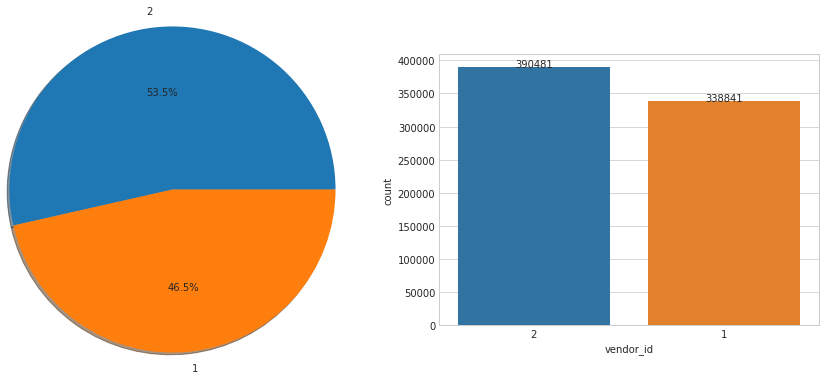

In [11]:
uva_plot(df_data,'vendor_id')

Note:
* There are only two vendors available and out of them the vendor with vendor_id=2 has the most number of records

Distinct values in feature  passenger_count :
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64


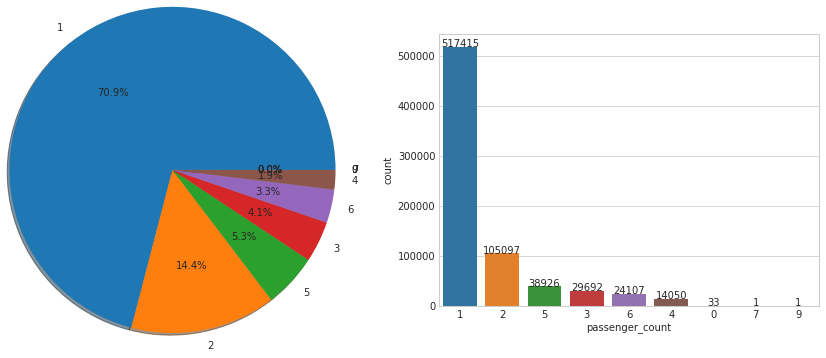

In [12]:
uva_plot(df_data,'passenger_count')

Note:
* As the passenger count 1 is the highest, we can infer that most New Yorker prefer to book individual cabs

Distinct values in feature  store_and_fwd_flag :
N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64


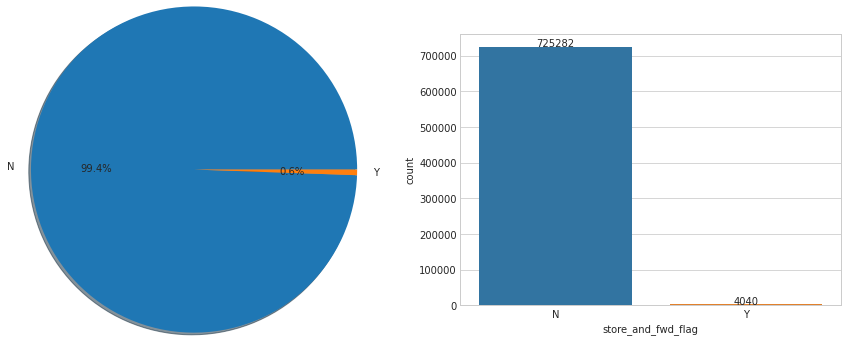

In [13]:
uva_plot(df_data,'store_and_fwd_flag')

Note:
* As the number of N is far greater than the number of Y we can assume -> i) the NYC taxis have a stable internet connectivity throughout the journey OR ii) the NYC taxis do not generally store trip record in vehicle memory and this function is only available in the latest taxis.

In [14]:
def compare_side_by_side(Dataframe,col1,col2):
    #function to side-by-side compare the datetime features
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    label1 = Dataframe[col1].value_counts().index
    ax = sns.countplot(x=col1, data=Dataframe, order=label1)
    for p in ax.patches:
        height=p.get_height()
        ax.text(x=p.get_x()+(p.get_width()/2),
        y=height+0.2,ha='center',s='{:.0f}'.format(height))
    

    plt.subplot(1,2,2)
    label2 = Dataframe[col2].value_counts().index
    bx = sns.countplot(x=col2, data=Dataframe, order=label2)
    for p in bx.patches:
        height=p.get_height()
        bx.text(x=p.get_x()+(p.get_width()/2),
        y=height+0.2,ha='center',s='{:.0f}'.format(height))
    plt.show()

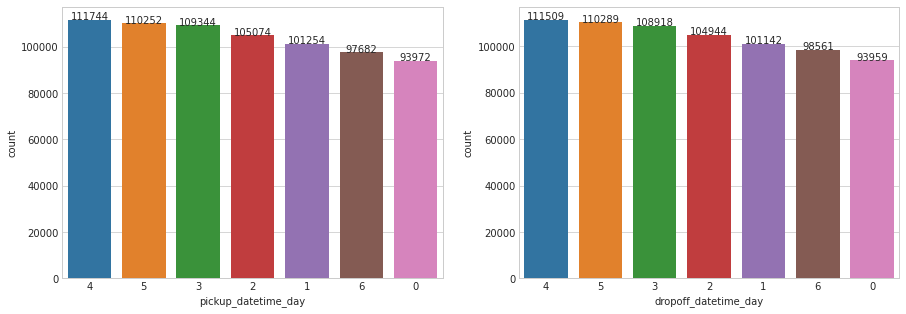

In [15]:
compare_side_by_side(df_data,'pickup_datetime_day','dropoff_datetime_day')

Note:
* From the above plots we can observe that the maximum number of Taxi rides were taken on Friday (i.e. 4) and the least number of Taxi rides were taken on Monday (i.e. 0)

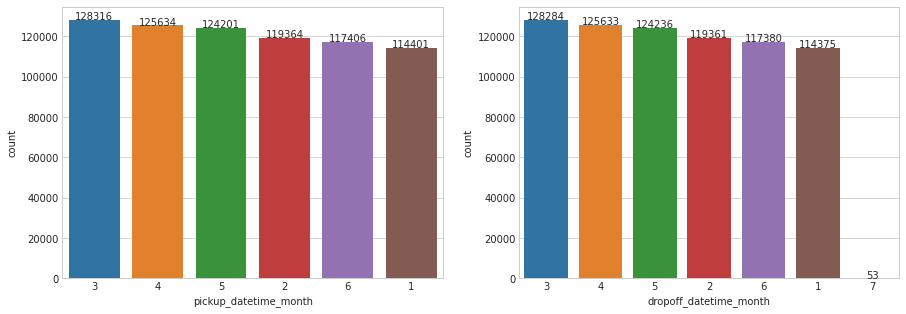

In [16]:
compare_side_by_side(df_data,'pickup_datetime_month','dropoff_datetime_month')

Note:
* From the above plots we can observe that the maximum number of Taxi rides were taken in March (i.e. 3)

<AxesSubplot:>

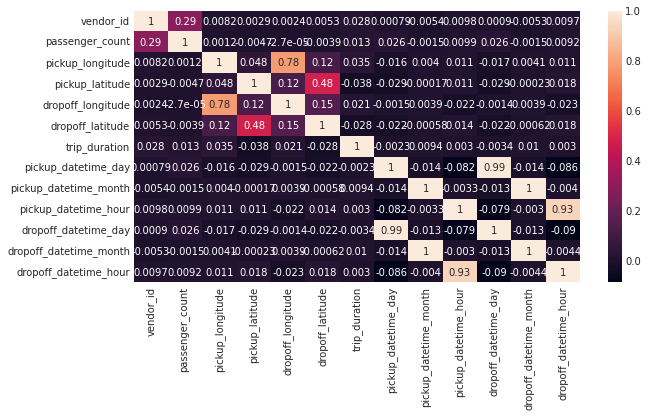

In [17]:
#Correlation
plt.figure(figsize=(10,5))
sns.heatmap(df_data.corr(), annot=True)